In [ ]:
missing_values= df.isnull().sum()

missing_values, df.dtypes

df = df.rename(columns={'Chronic obstructive pulmonary disease': 'COPD'})


print("Categorical columns' unique values before standardization: /n")
categorical_columns= ['Gender', 'Diabetes', 'Hypertension', 'Heart disease', 'Cancer', 'COPD', 'Kidney disease', 'Medication adherence', 'Service request']
for column in categorical_columns:
    print(column, df[column].unique())


Categorical columns' unique values before standardization: /n
Gender ['F' 'M']
Diabetes ['No' 'Yes']
Hypertension ['Medium' 'No' 'Moderate' 'High']
Heart disease ['No' 'Yes']
Cancer ['No' 'Yes']
COPD ['No' 'Yes']
Kidney disease ['No' 'Yes']
Medication adherence ['High' 'Low']
Service request ['Nursing care' 'general medicine' 'internal medicine' 'pneumology'
 'cardiology']


In [ ]:
##                                  ****** Standardizing text data ******



# binary data (yes, no) -> (0, 1)
binary_columns= ['Diabetes', 'Heart disease', 'Cancer', 'COPD', 'Kidney disease']
for column in binary_columns:
    df[column]= df[column].replace({'No': 0, 'Yes': 1})

df['Medication adherence'] = df['Medication adherence'].replace({'High': 1, 'Low': 0})

# Standardize text data in 'Service request' column
df['Service request']= df['Service request'].str.title().str.strip()

print("Categorical columns' unique values after standardization: /n")
categorical_columns= ['Gender', 'Diabetes', 'Hypertension', 'Heart disease', 'Cancer', 'COPD', 'Kidney disease', 'Medication adherence', 'Service request']
for column in categorical_columns:
    print(column, df[column].unique())





Categorical columns' unique values after standardization: /n
Gender ['F' 'M']
Diabetes [0 1]
Hypertension ['Medium' 'No' 'Moderate' 'High']
Heart disease [0 1]
Cancer [0 1]
COPD [0 1]
Kidney disease [0 1]
Medication adherence [1 0]
Service request ['Nursing Care' 'General Medicine' 'Internal Medicine' 'Pneumology'
 'Cardiology']


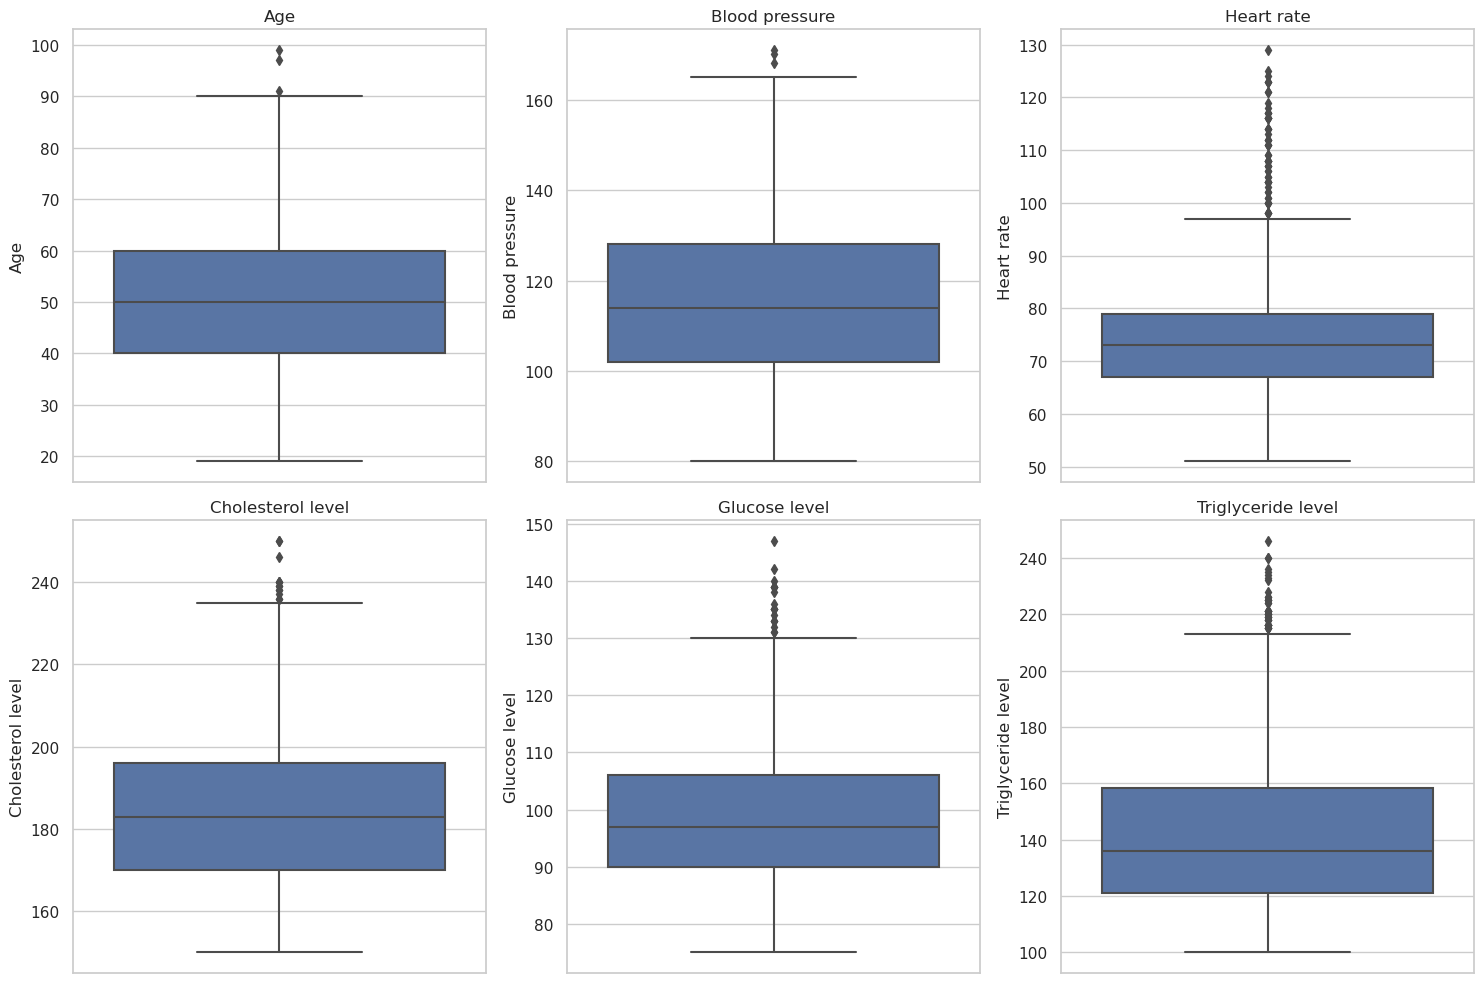

In [ ]:
# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Selecting columns for box plots
box_plot_columns = ['Age', 'Blood pressure', 'Heart rate', 'Cholesterol level', 'Glucose level', 'Triglyceride level']

# Creating box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(box_plot_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

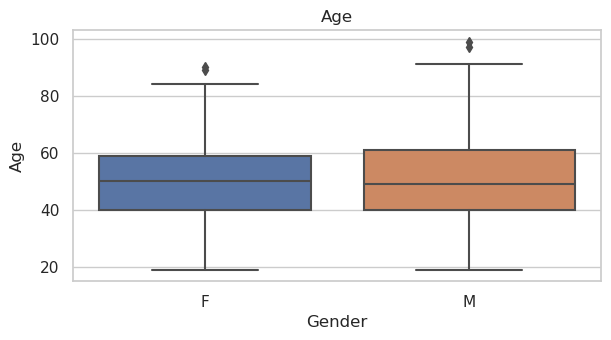

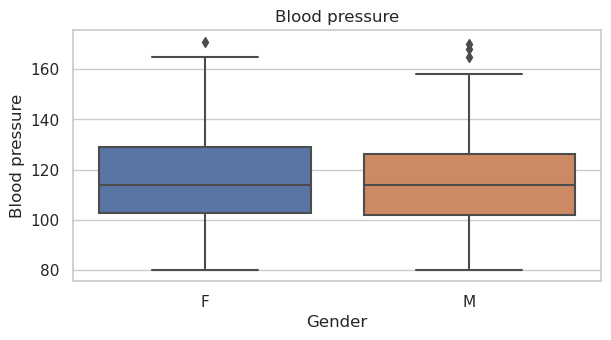

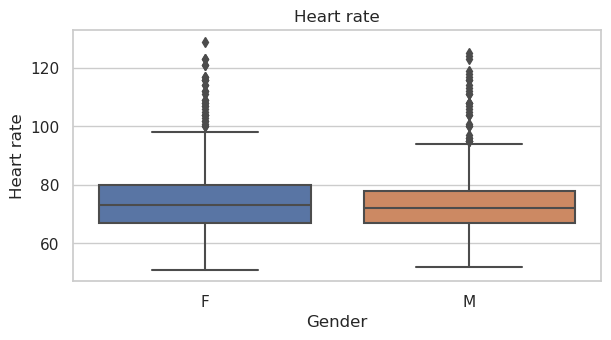

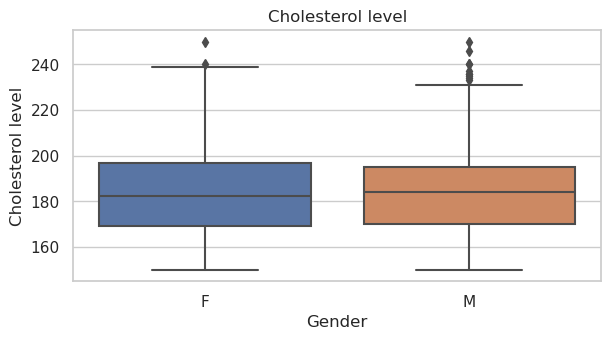

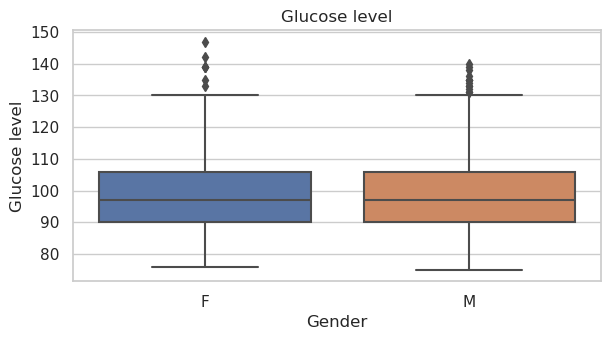

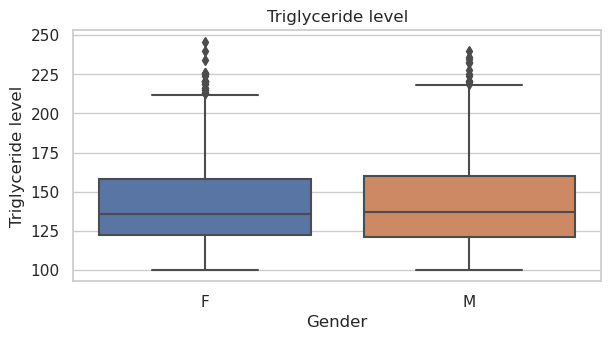

In [ ]:
# side-by-side boxplot for the numerical attributes respect to the gender

for i, col in enumerate(box_plot_columns, 1):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 2, i)
    sns.boxplot(x= 'Gender', y=col, data= df)
    plt.title(col)


In [ ]:
# Identifying outliers using the IQR method
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Summarize the number of outliers in each column
outlier_counts = {col: len(outliers_data) for col, outliers_data in outliers.items() if not outliers_data.empty}
outlier_counts


{'Age': 3,
 'Longitude': 1,
 'Diabetes': 120,
 'Heart disease': 36,
 'Cancer': 34,
 'COPD': 50,
 'Kidney disease': 70,
 'Glucose level': 20,
 'CRP': 101,
 'PT': 43,
 'Cholesterol level': 13,
 'Triglyceride level': 40,
 'Blood pressure': 3,
 'Heart rate': 60,
 'Body temperature': 32,
 'Oxygen saturation': 37,
 'Pain level': 20,
 'Medication adherence': 131,
 'WBC': 58,
 'RBC': 72}

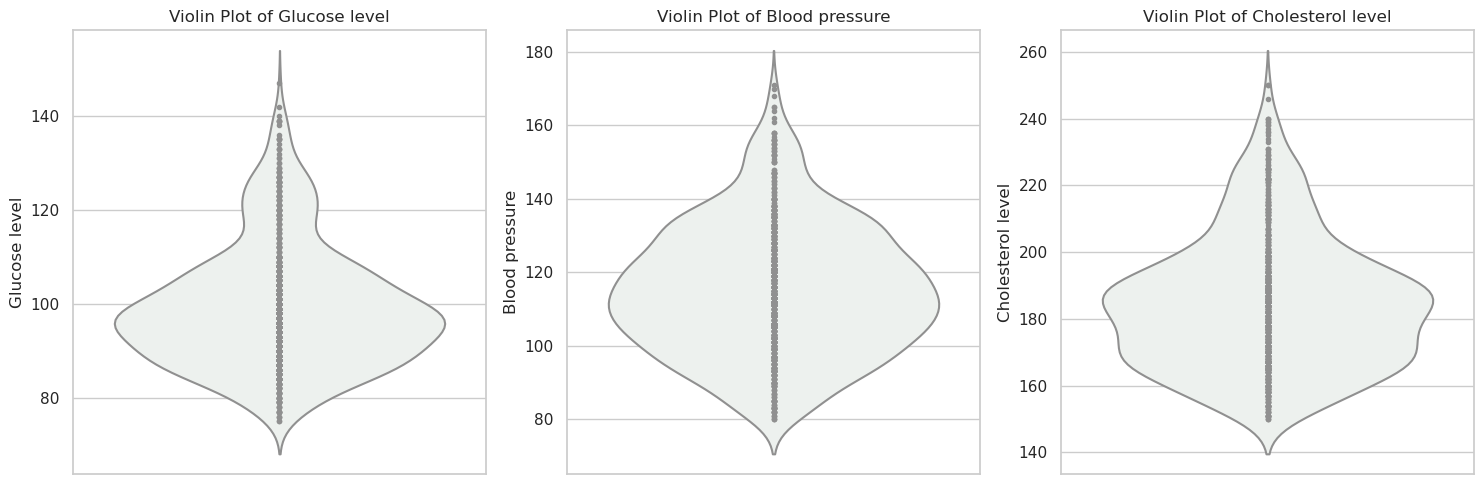

In [ ]:
# Visualizing outliers with violin plots for a more detailed view

key_medical_columns = ['Glucose level', 'Blood pressure', 'Cholesterol level']

plt.figure(figsize=(15, 5))
for i, col in enumerate(key_medical_columns, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=df[col], inner="point", palette="light:g")
    plt.title(f"Violin Plot of {col}")

plt.tight_layout()
plt.show()

<Axes: >

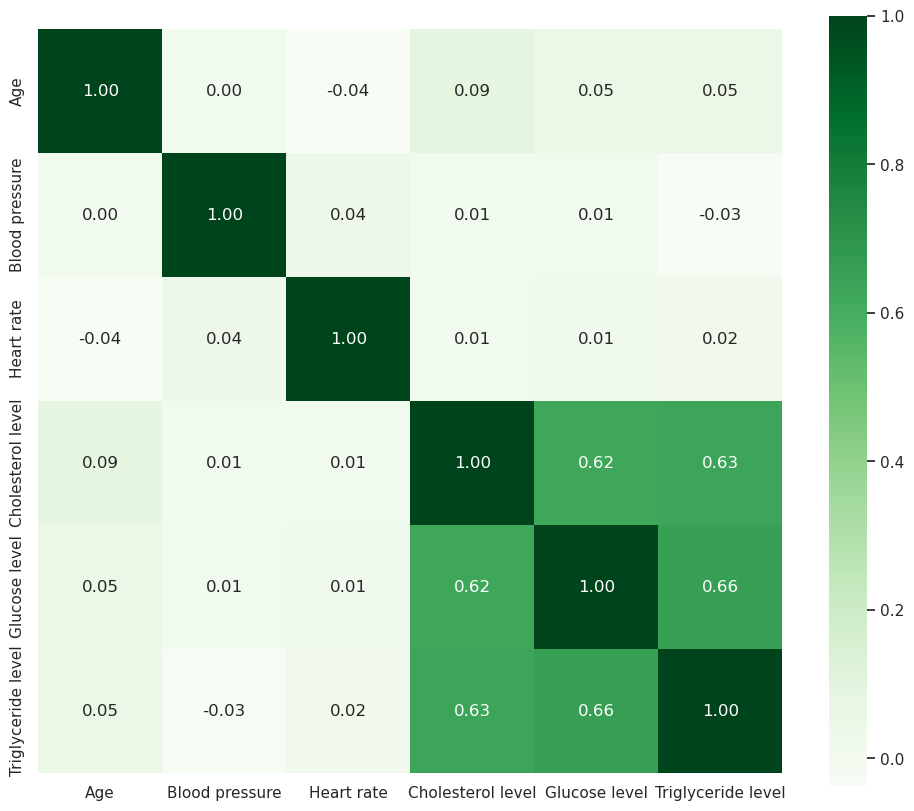

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[box_plot_columns].corr(), annot=True,
            fmt=".2f", cmap='Greens', square=True)

<Axes: xlabel='Heart disease', ylabel='Heart rate'>

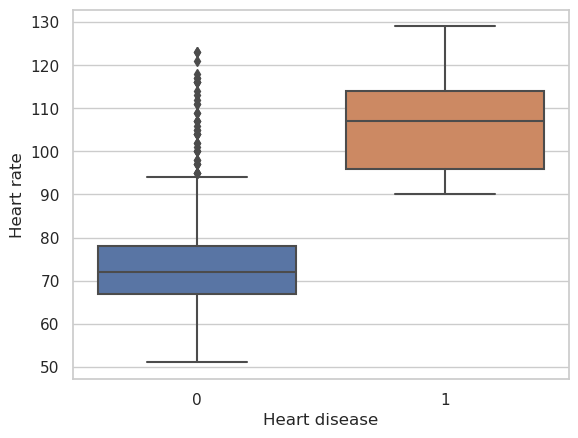

In [ ]:
sns.boxplot(x= 'Heart disease', y='Heart rate', data= df)

In [ ]:
### DATA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label encode the 'Service Request' since it's a categorical variable
label_encoder = LabelEncoder()

df['Service request'] = label_encoder.fit_transform(df['Service request'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop(['Service request'], axis=1))

# Scale the data to make it suitable for chi-squared test
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Split the data into features and target variable
X = df_scaled
y = df['Service request']

In [ ]:
# Apply SelectKBest class to extract top 'k' best features
bestfeatures = SelectKBest(score_func=chi2, k='all') # You can change k to the number of top features you want
fit = bestfeatures.fit(X, y)

# Get scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_encoded.columns)

# Concatenate two dataframes for better visualization and print them
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(5, 'Score')) # change k to the number of top features you want to see


           Feature       Score
6    Heart disease  655.812865
8             COPD  554.253990
5         Diabetes  385.263158
9   Kidney disease  224.736842
12              PT   54.909835


<Axes: >

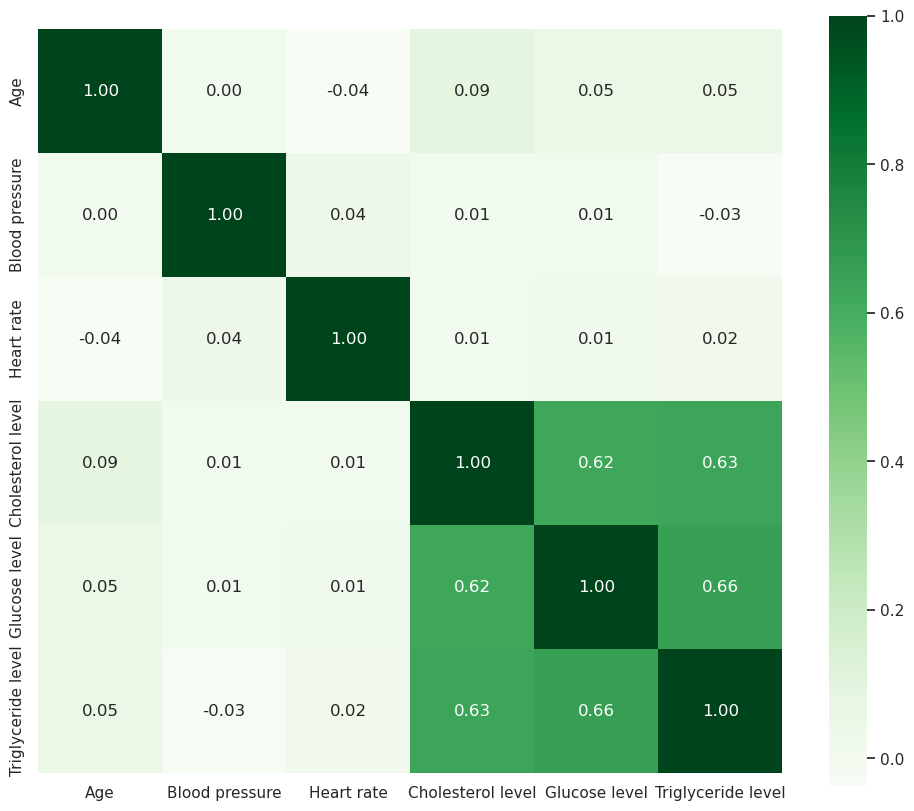

In [ ]:
plt.figure(figsize=(12, 10))

sns.heatmap(df[box_plot_columns].corr(), annot=True, fmt=".2f", cmap='Greens', square=True)


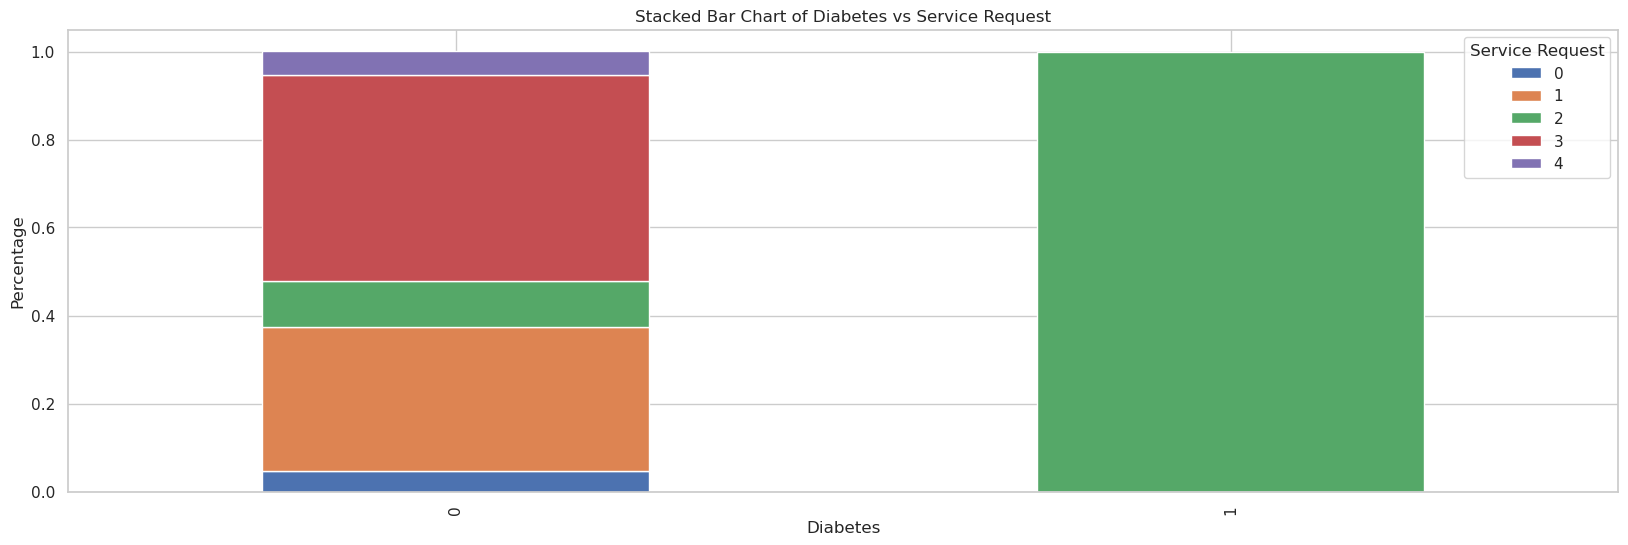

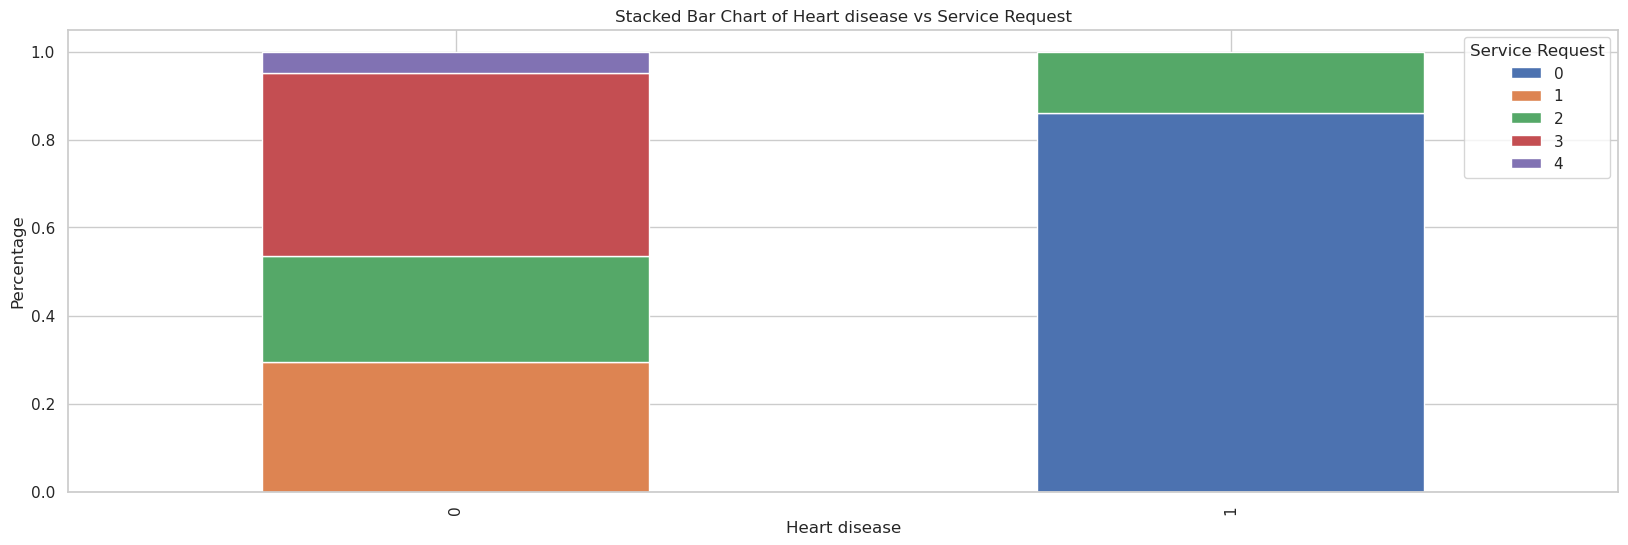

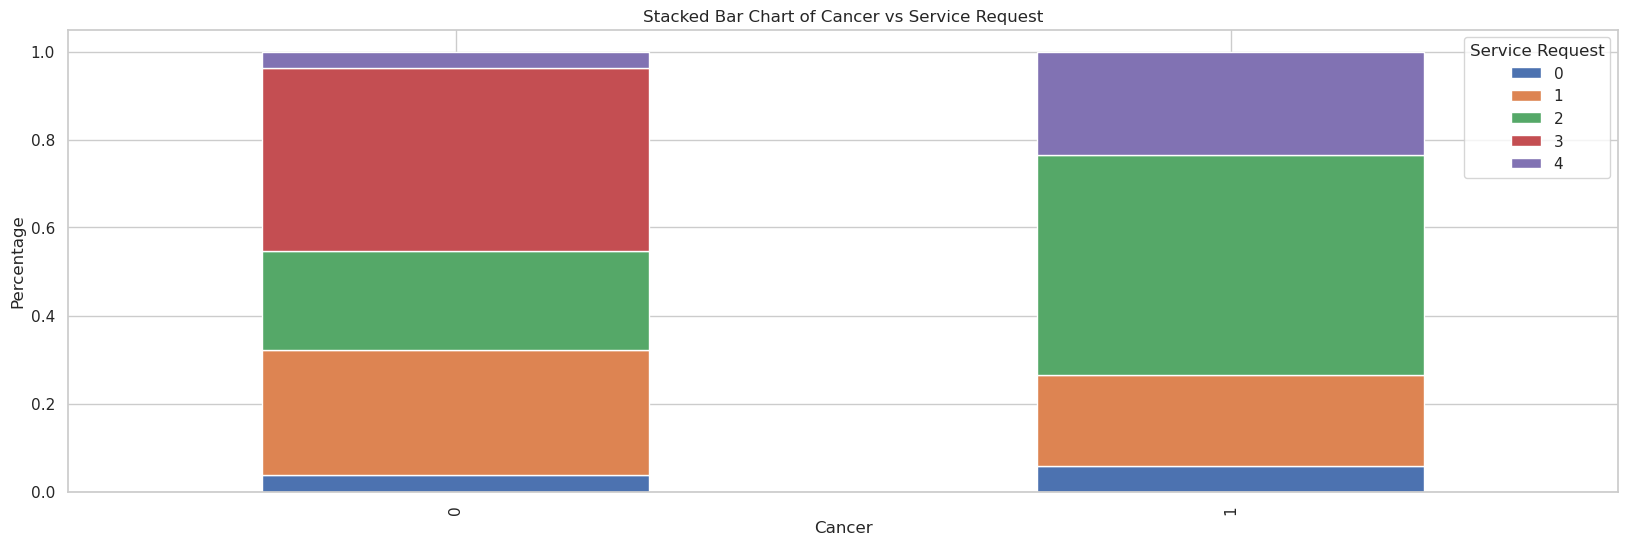

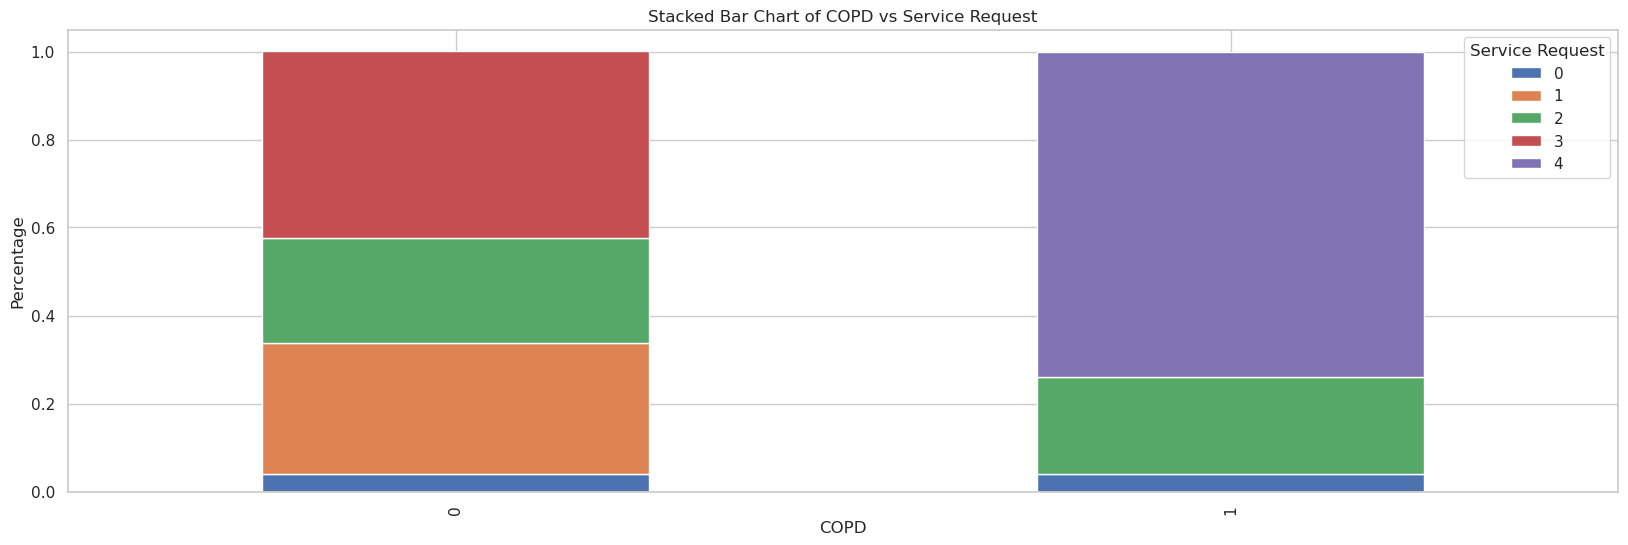

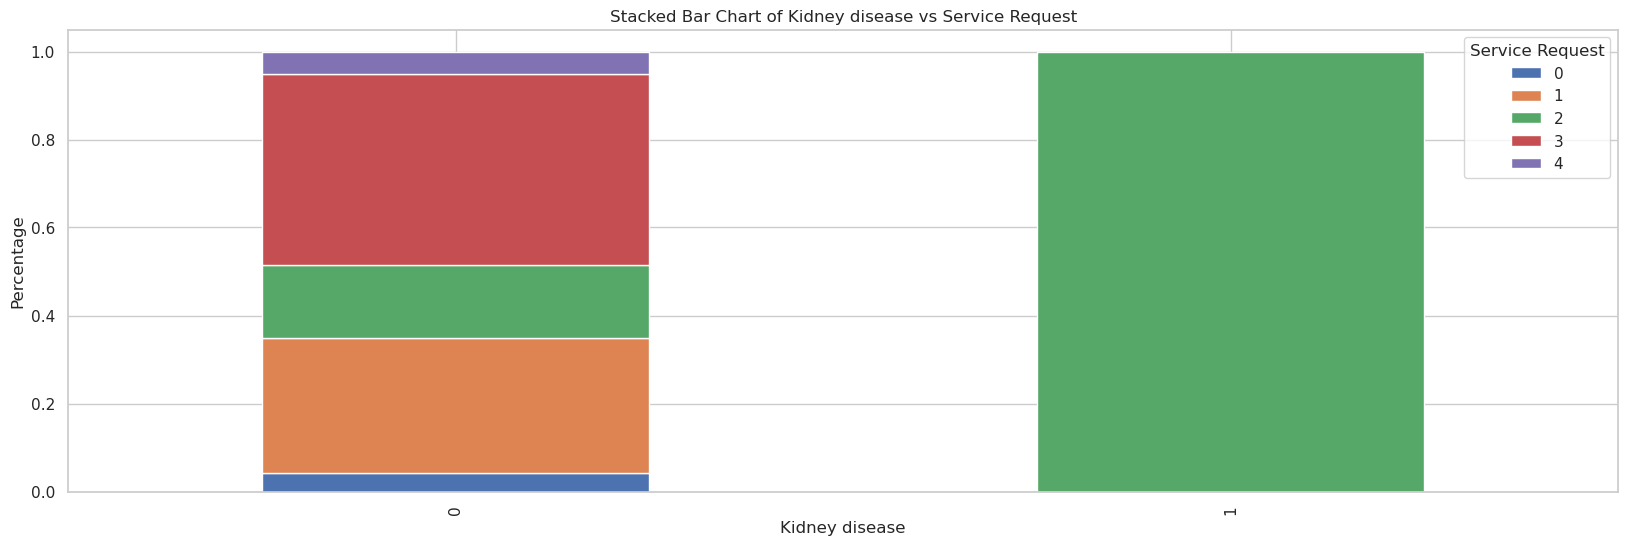

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode your categorical data for visualization
label_encoder = LabelEncoder()
df['Service Request'] = label_encoder.fit_transform(df['Service request'])

# Visualize with stacked bar chart


for disease in binary_columns:
    crosstab = pd.crosstab(df[disease], df['Service Request'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(20, 6))
    plt.title(f'Stacked Bar Chart of {disease} vs Service Request')
    plt.ylabel('Percentage')
    plt.xlabel(disease)
    plt.show()

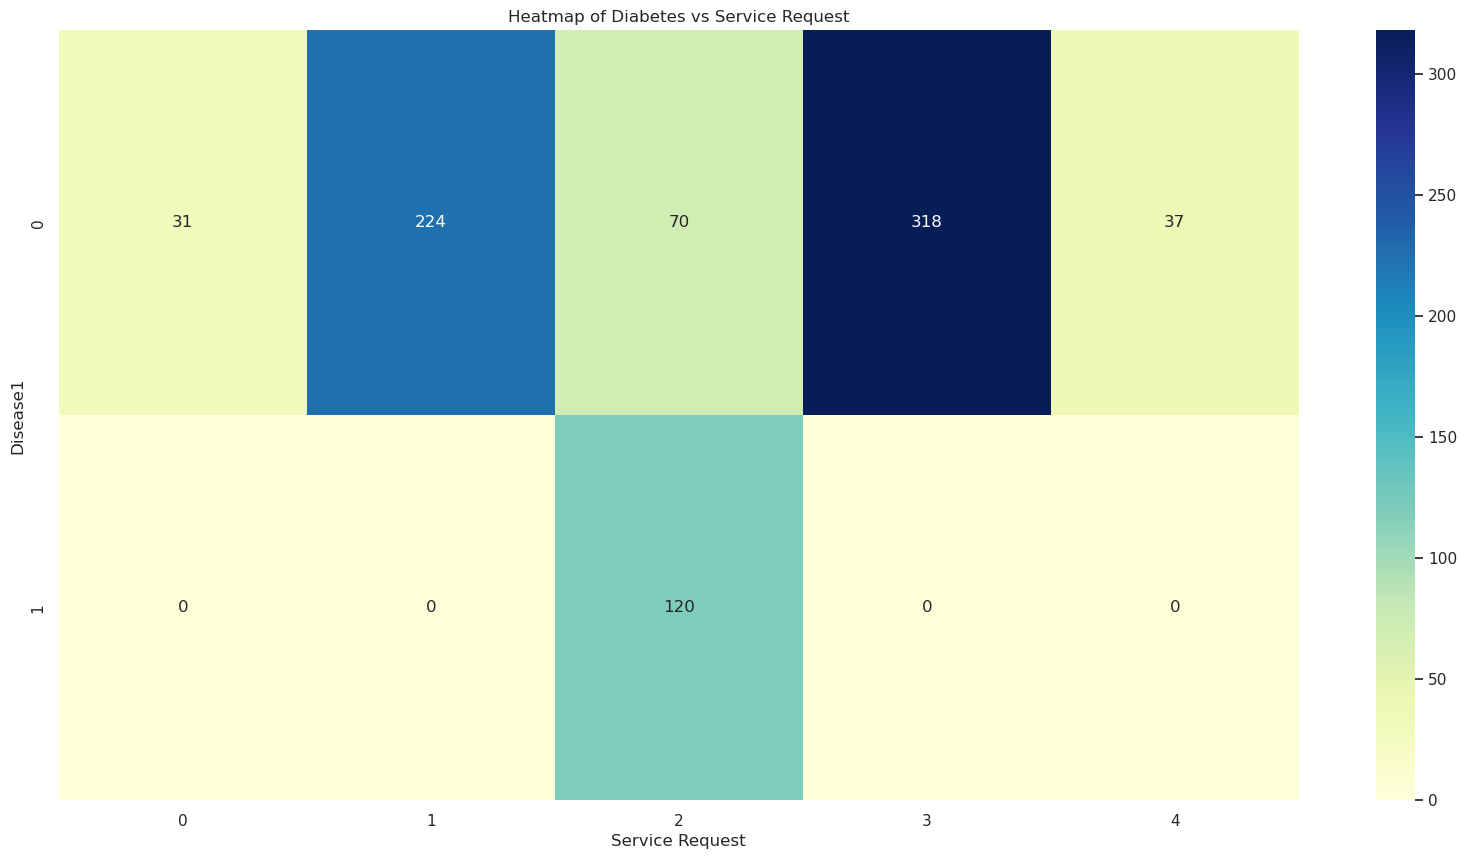

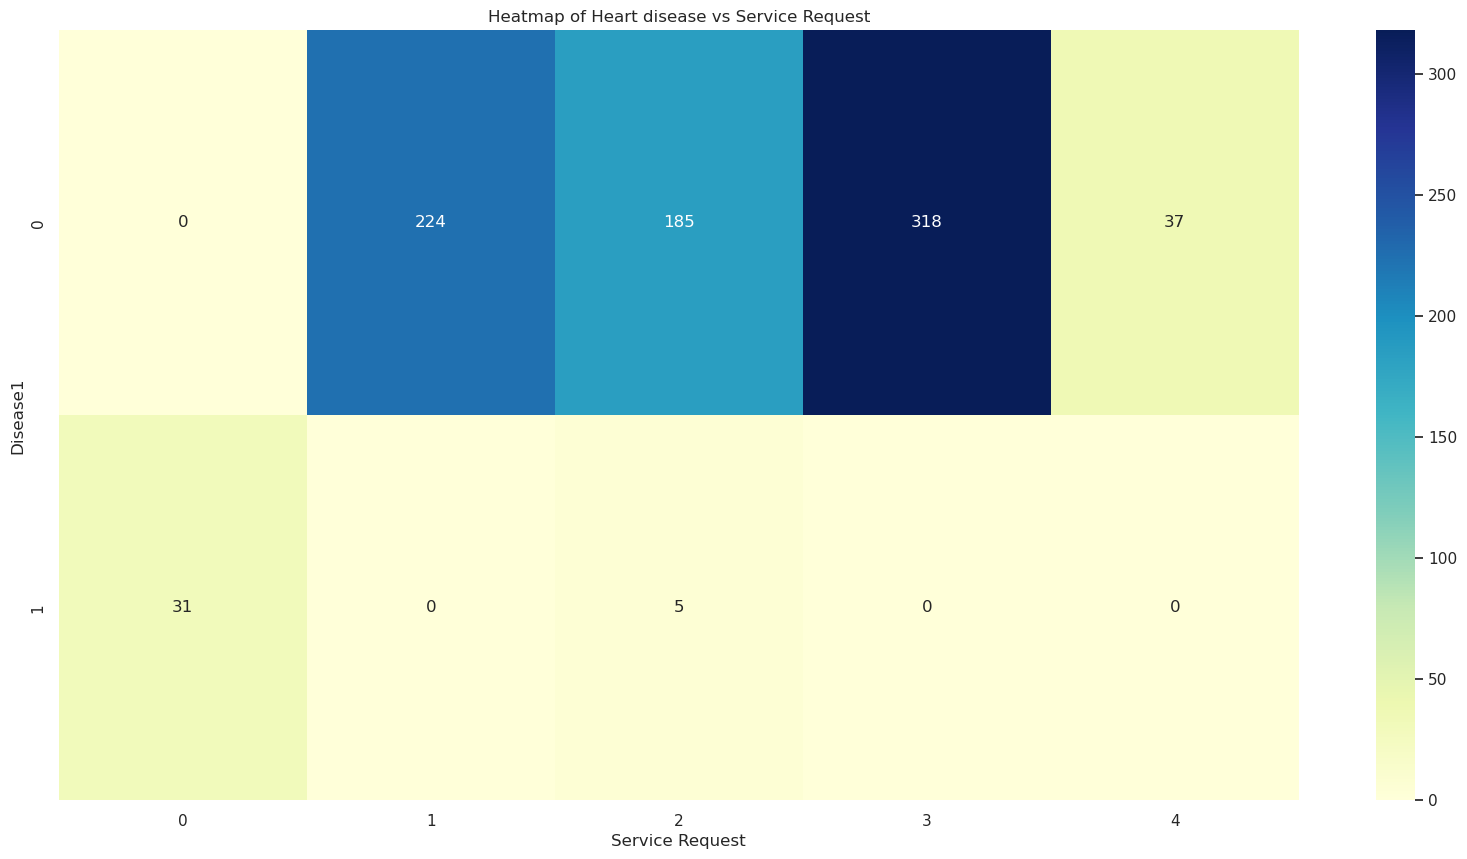

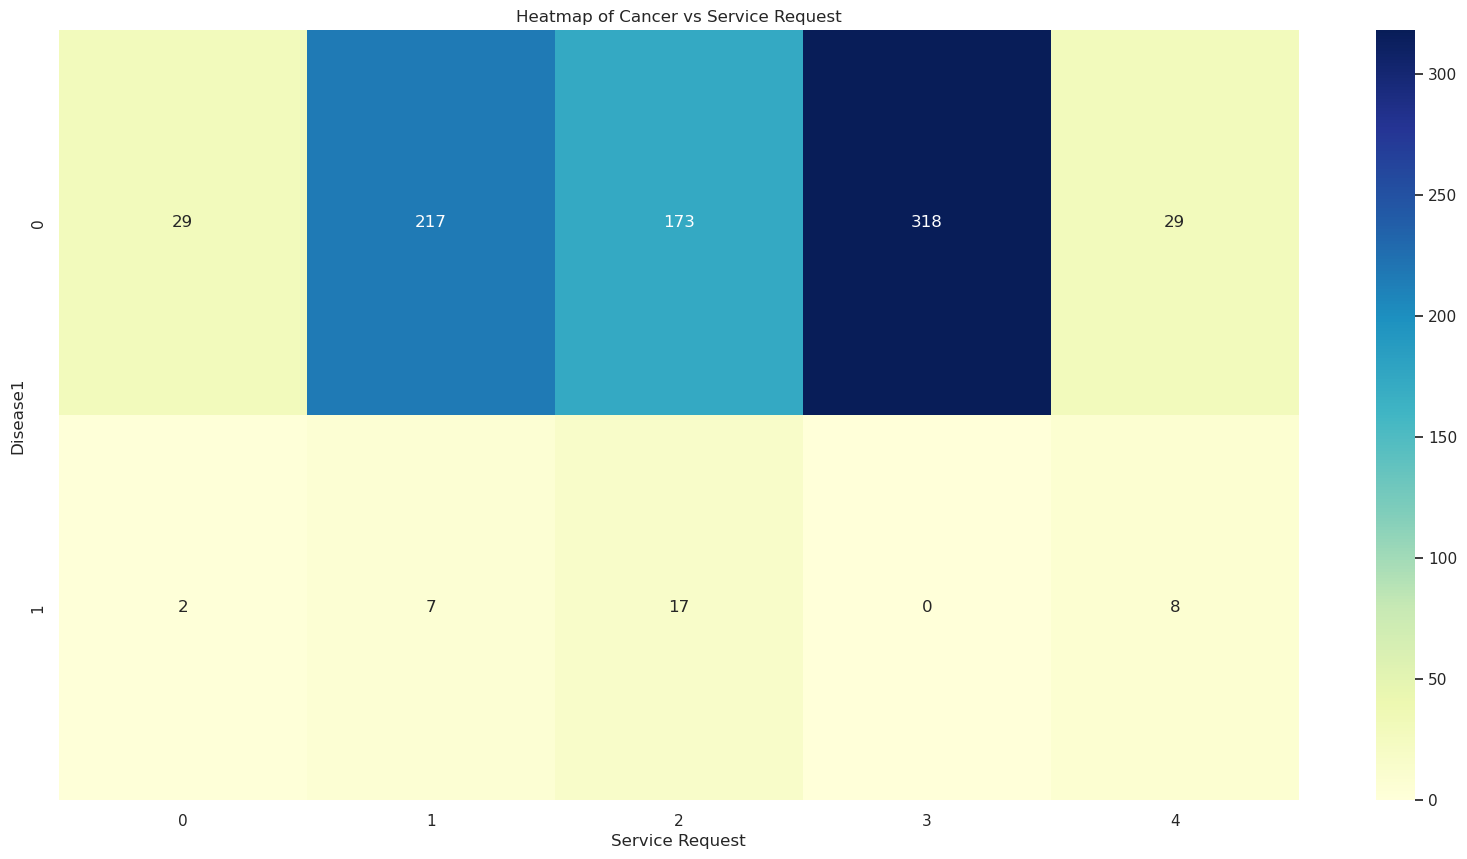

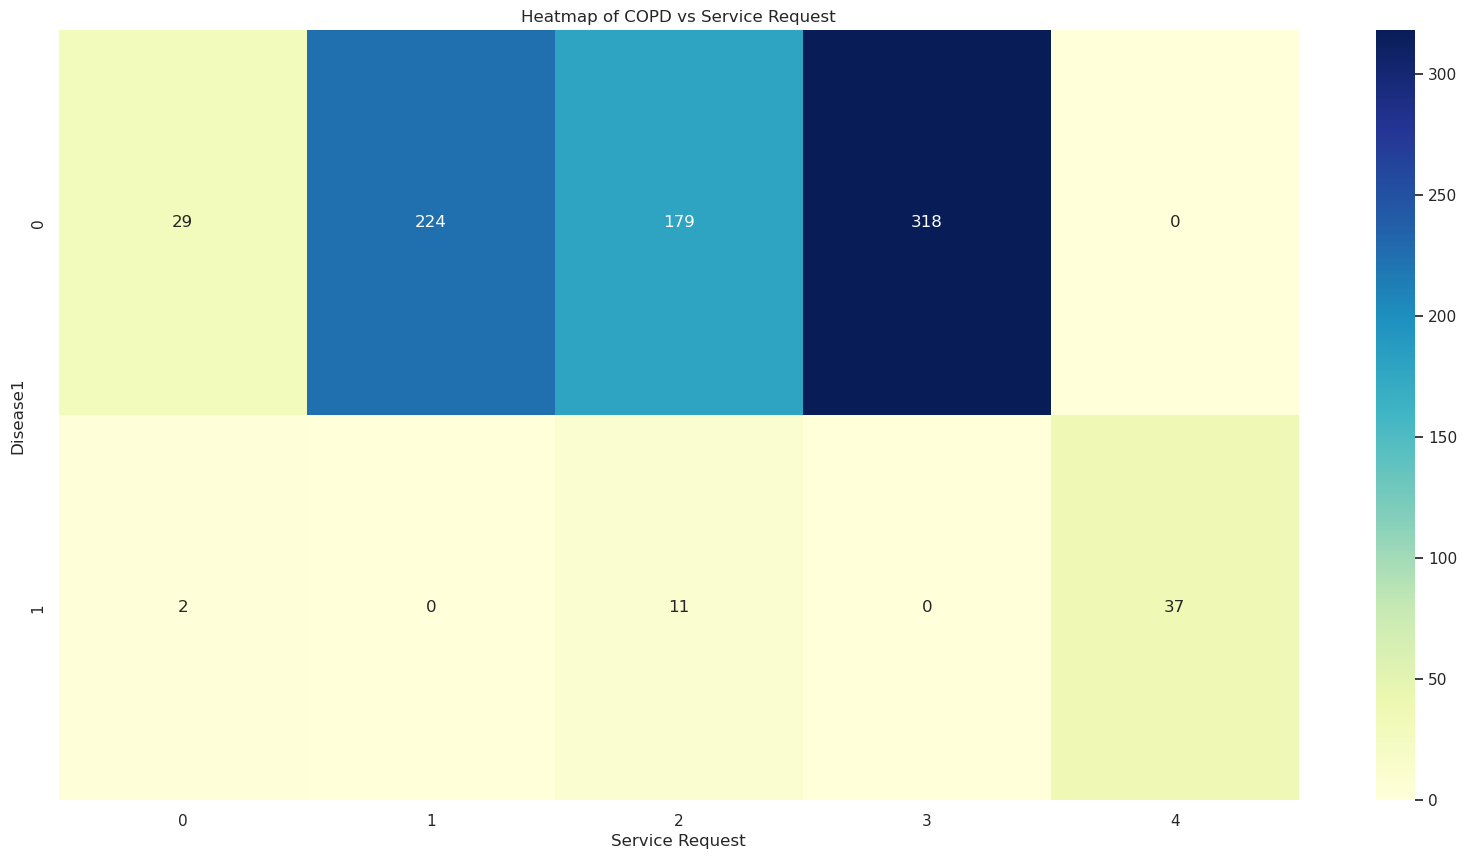

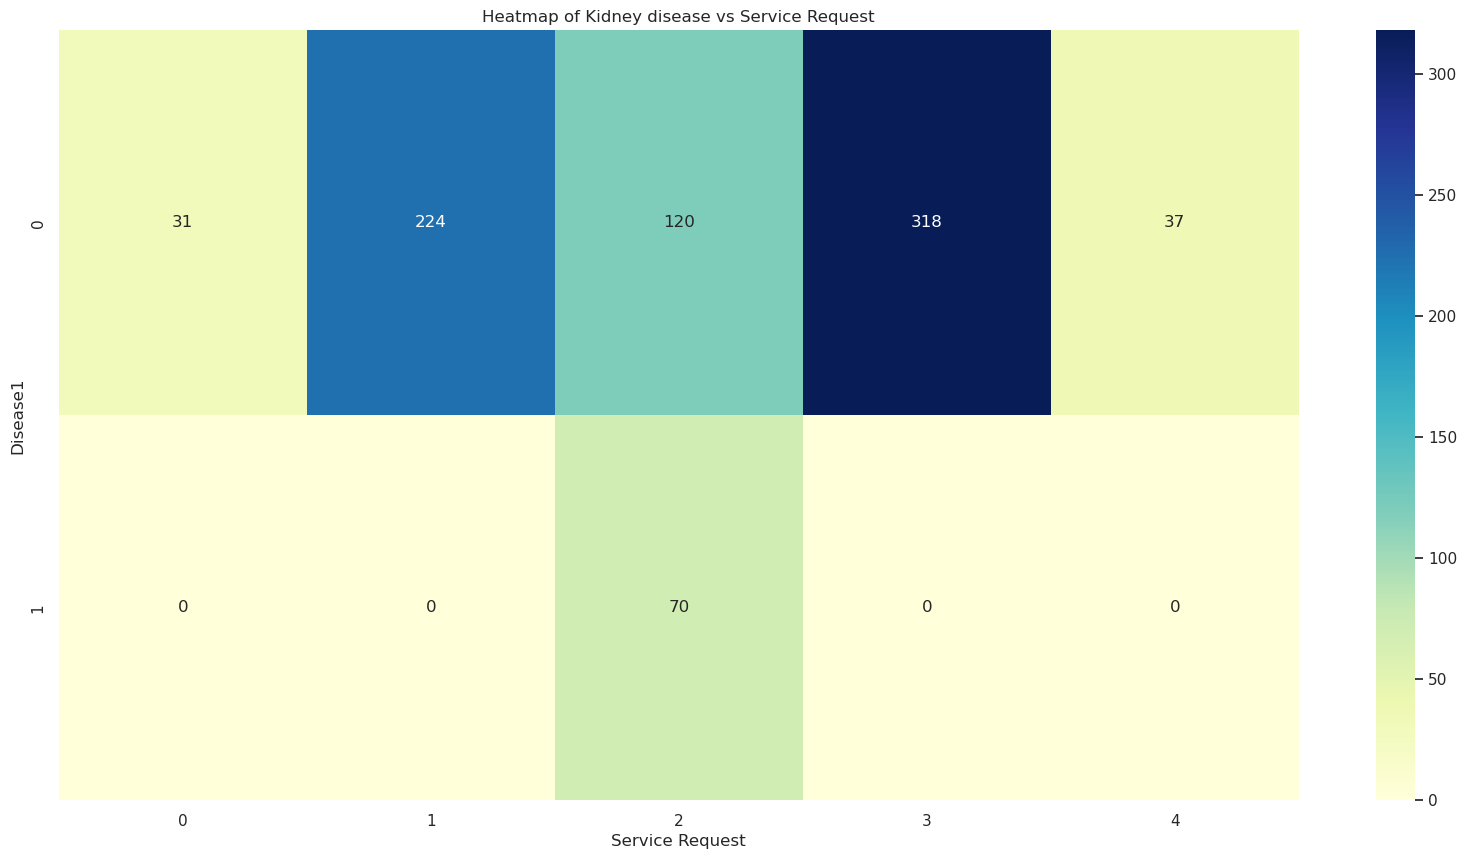

In [ ]:
for col in binary_columns:
    ct = pd.crosstab(df[col], df['Service Request'])
    plt.figure(figsize=(20, 10))
    sns.heatmap(ct, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f'Heatmap of {col} vs Service Request')
    plt.ylabel('Disease1')
    plt.xlabel('Service Request')
    plt.show()